In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
np.random.seed(42)

In [3]:
#Initializing the given data
num_points = (10,100,int(1e3),int(1e4),int(1e5))

mean = np.array([1,2])
mean = mean.reshape(2,1)

cov = np.array([[1.6250, -1.9486],
                [-1.9486, 3.8750]])
values, vectors = np.linalg.eig(cov)
values = np.diag(values)
values = np.sqrt(values)
vectors

array([[-0.86602302,  0.50000412],
       [-0.50000412, -0.86602302]])

#### Part 1: Generating sample points from 2D Gaussian


In [4]:
def randomPointGenerator():
    point = np.random.randn(2,1)
    point = np.matmul(values, point)
    point = np.matmul(vectors, point)
    
    point = point + mean
    return point

In [5]:
p = randomPointGenerator()
print(p)

[[0.54125203]
 [2.09213802]]


In [6]:
mean_error_data = []
cov_error_data = []
samples = []
for N in num_points:
    mean_error = []
    cov_error = []
    for i in range(0,100):
        sample = []
        
        for j in range(0,N):
            point = randomPointGenerator()
            sample.append(point)
        
        sample = np.array(sample)
        sample.reshape(N,2)
        
        sample_mean  = np.array([sample[:,0].reshape(1,N).mean(), sample[:,1].reshape(1,N).mean()]).reshape(2,1)
        sample_cov = np.cov(sample[:,0].reshape(1,N), sample[:,1].reshape(1,N)).reshape(2,2)
        
        mean_err = np.linalg.norm(mean - sample_mean)/np.linalg.norm(mean)
        mean_error.append(mean_err)
        
        cov_err = np.linalg.norm(cov - sample_cov)/np.linalg.norm(cov)
        cov_error.append(cov_err)
        
    mean_error_data.append(mean_error)
    cov_error_data.append(cov_error)
    samples.append(sample)
    
    

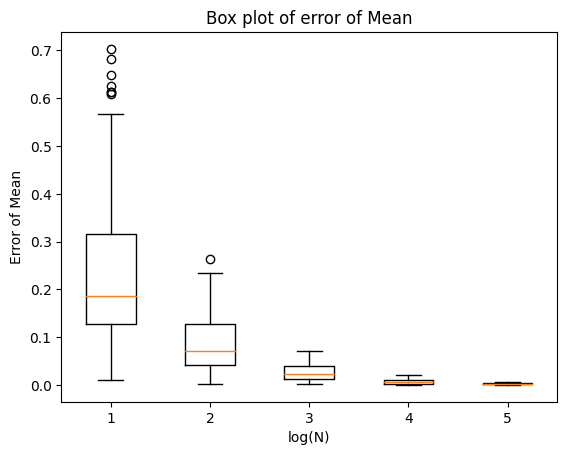

In [7]:
plt.boxplot(mean_error_data)
plt.title("Box plot of error of Mean")
plt.ylabel("Error of Mean")
plt.xlabel("log(N)")
plt.show()

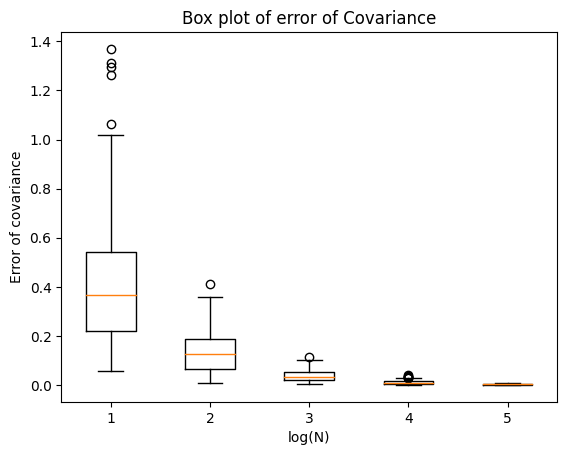

In [8]:
plt.boxplot(cov_error_data)
plt.title("Box plot of error of Covariance")
plt.ylabel("Error of covariance")
plt.xlabel("log(N)")
plt.show()

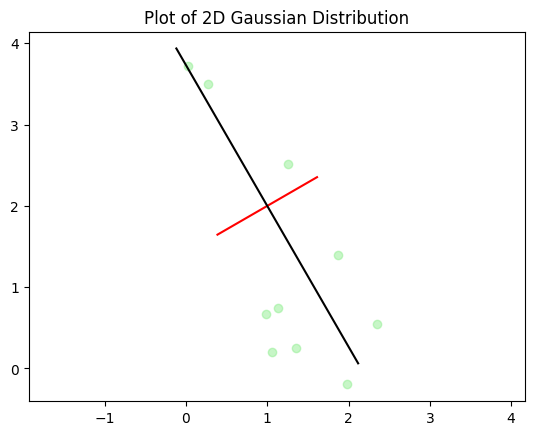

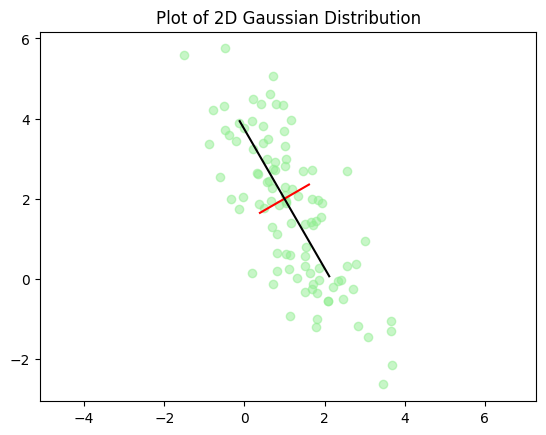

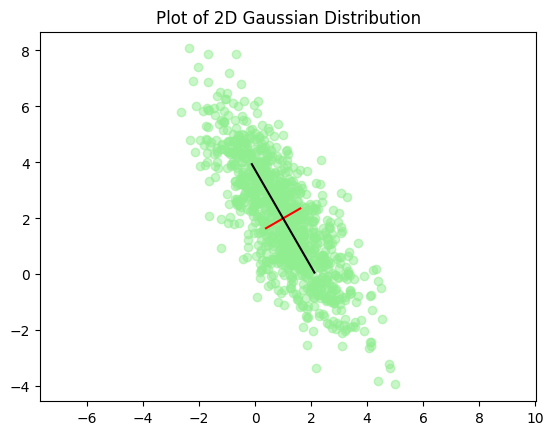

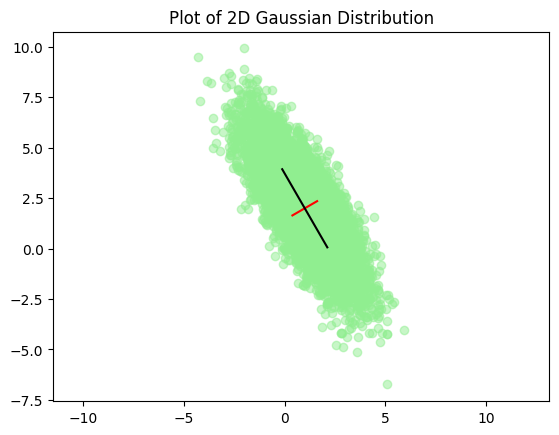

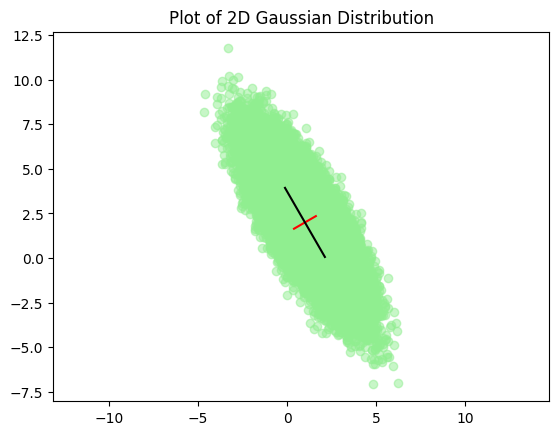

In [9]:
e_vals = values.diagonal()

mid_point = mean.copy().reshape(2,)
p1 = mid_point - e_vals[0]*vectors[:,0]
p2 = mid_point + e_vals[0]*vectors[:,0]

p3 = mid_point - e_vals[1]*vectors[:,1]
p4 = mid_point + e_vals[1]*vectors[:,1]

line1 = np.array([p1,p2])
line2 = np.array([p3,p4])

for i in range(len(num_points)):
    plt.scatter(samples[i][:,0],samples[i][:,1],alpha=0.5, color='lightgreen')
    plt.title("Plot of 2D Gaussian Distribution")
    plt.plot(line1[:,0], line1[:,1], linestyle='-', color='red')
    plt.plot(line2[:,0], line2[:,1], linestyle='-', color='black')
    plt.axis('equal')
    
    plt.show()